# Spam Classification using Logistic Regression 

# 1. Business Understanding

The purpose of this project is to develop a spam filter that can identify the probability that an email is spam. We converted the characteristics into numerical data so that we could use logistic regression on it. The filter's ability to provide probabilities allows it to classify emails as spam or not spam. This spam filter enables the email software to offer spam filtering to its users, improving their satisfaction and increasing the number of users of the email service, leading to higher revenue.

# 2. Data Understanding

Before using the data to build a model, it is important to evaluate its quality and identify any missing or irrelevant information. In this case, there are two categorical attributes that need to be converted into numerical data in order to be used in the model. Once these attributes are converted, a threshold is determined based on the quality of the data. Additionally, there is a time attribute that needs to be converted into a format that can be used in the model using the datetime library. After conducting the logistic regression, the p-values for the coefficients in the table can be examined. If the p-value is greater than 0.05, it means that the coefficient does not significantly affect the probability value.

# 3. Data Preparation

## Importing Libraries

In [44]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sqlite3 import connect
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Retrieving the table from the SQLite database.

In [45]:
connection = connect("../../dataset/dataset.db")
query = "SELECT * FROM " + "prj2"
df = pd.read_sql(query, connection)
print(df.describe())

             index         spam  to_multiple         from           cc  \
count  3921.000000  3921.000000  3921.000000  3921.000000  3921.000000   
mean   1960.000000     0.093599     0.158123     0.999235     0.404489   
std    1132.039531     0.291307     0.364903     0.027654     2.666424   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     980.000000     0.000000     0.000000     1.000000     0.000000   
50%    1960.000000     0.000000     0.000000     1.000000     0.000000   
75%    2940.000000     0.000000     0.000000     1.000000     0.000000   
max    3920.000000     1.000000     1.000000     1.000000    68.000000   

        sent_email        image       attach       dollar      inherit  \
count  3921.000000  3921.000000  3921.000000  3921.000000  3921.000000   
mean      0.277990     0.048457     0.132874     1.467228     0.038001   
std       0.448066     0.450848     0.718518     5.022298     0.267899   
min       0.000000     0.000000     0

## Transforming the time attribute into numerical data using the datetime library.

In [46]:
import datetime as dt
df['time'] = pd.to_datetime(df['time'])
df['time'] = df["time"].map(dt.datetime.toordinal)

In [47]:
df = df.query("number != 'none'")

## Converting categorical data into numerical data using one-hot encoding.

In [48]:
df['winner'] = pd.get_dummies(df['winner'])['yes']
df['number'] = pd.get_dummies(df['number'])['big']

## Exploratory Data Analysis

c:\Users\bnsap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='spam', ylabel='count'>

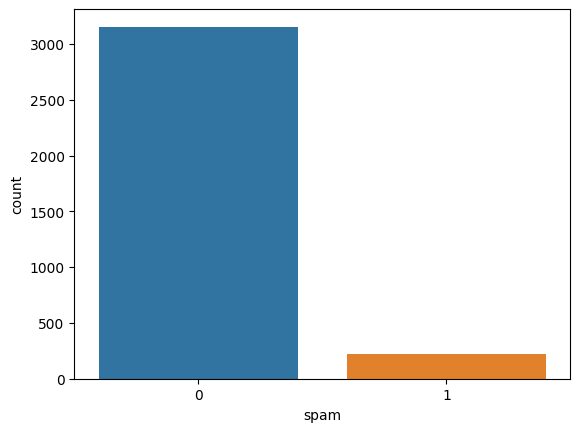

In [49]:
sns.countplot(df["spam"])

<Axes: title={'center': 'line_breaks'}, xlabel='winner'>

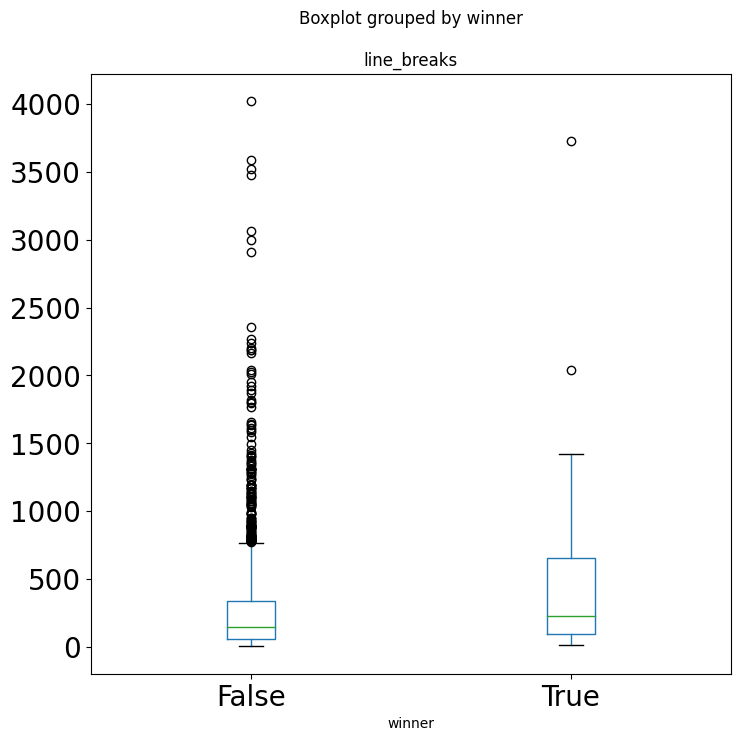

In [50]:
df.boxplot(column=['line_breaks'],by='winner',grid=False,figsize=(8,8),fontsize=20)

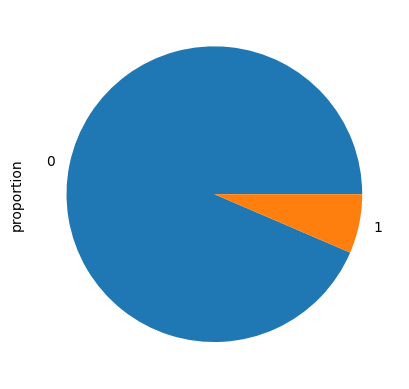

In [51]:
a= df["spam"].value_counts(normalize=True).plot.pie()

# 4. Logistic Regression Model

## Dividing the dataset into a training set and a testing set.

In [52]:
test_data = df.sample(frac=0.2)
train_data = df.drop(test_data.index)

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 2698
No. of testing examples: 674


## Using the stats.model library to train the model.

In [53]:
Xtrain = train_data[['to_multiple', 'from', 'cc', 'sent_email', 'time',
       'image', 'attach', 'dollar', 'winner', 'inherit', 'viagra', 'password',
       'num_char', 'line_breaks', 'format', 're_subj', 'exclaim_subj',
       'urgent_subj', 'exclaim_mess', 'number']]
ytrain = train_data[['spam']]

log_reg = sm.GLM(ytrain.astype(float), Xtrain.astype(float), family = sm.families.Binomial(link = sm.families.links.logit())).fit()

## Vanilla code for Logistic regression (without using any libraries)

### Sigmoid function

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Prediction

In [13]:
def predict(X, w):
    z = np.dot(X, w[:-1,:]) + w[-1]
    probs = sigmoid(z)
        
    # Return the class with the highest probability
    return np.where(probs >= 0.5, 1, 0)

### Learning of the model using the gradient descent (learning rate = 0.01)

In [14]:
def fit(X, y, learning_rate=0.01, num_iterations=10000):
    # Add a bias column to X
    X = np.c_[np.ones((X.shape[0], 1)), X]
    w = np.random.randn(X.shape[1], 1)

    for i in range(num_iterations):
        z = np.dot(X, w)
        probs = sigmoid(z)
        error = probs - y
        
        # Calculate the gradient of the error with respect to the weights
        gradient = np.dot(X.T, error)
        
        # Update the weights using the gradient and the learning rate
        w -= learning_rate * gradient
    
    return w

In [15]:
X = Xtrain.to_numpy()
y = ytrain.to_numpy()
w = fit(X, y)
predictions = predict(X, w)

C:\Users\bnsap\AppData\Local\Temp\ipykernel_11028\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


## Summary of model generated by stats.model

In [55]:
print(log_reg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   spam   No. Observations:                 2698
Model:                            GLM   Df Residuals:                     2678
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -469.01
Date:                Thu, 14 Sep 2023   Deviance:                       938.02
Time:                        17:08:46   Pearson chi2:                 3.39e+03
No. Iterations:                    26   Pseudo R-squ. (CS):             0.1328
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
to_multiple     -3.7024      0.729     -5.078   

## Examining the coefficients and how they influence the output.

 Hypothesis testing for the coefficients:
   $$ H_0 : \beta_{coefficient} = 0 $$
   $$ H_1 : \beta_{coefficient} \neq 0 $$

In hypothesis testing for the coefficients of the model, the null hypothesis is that the coefficient has no effect on the output (i.e., it is equal to zero), while the alternative hypothesis is that the coefficient does have an effect on the output (i.e., it is not equal to zero). If the p-value of a coefficient is greater than 0.05, it means that there is not enough evidence to reject the null hypothesis, and therefore it can be concluded that the coefficient does not have a significant effect on the output. In the summary table, some of the coefficients have p-values greater than 0.05, indicating that they do not have a significant effect on the output of the model.

## Evaluating the model using the test dataset.

### predictions using stats model

In [17]:
Xtest = test_data[['to_multiple', 'from', 'cc', 'sent_email', 'time',
       'image', 'attach', 'dollar', 'winner', 'inherit', 'viagra', 'password',
       'num_char', 'line_breaks', 'format', 're_subj', 'exclaim_subj',
       'urgent_subj', 'exclaim_mess', 'number']]
ytest = test_data['spam']

yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))

### predictions using vanilla code

In [18]:
predictions = predict(Xtest.to_numpy(), w)

C:\Users\bnsap\AppData\Local\Temp\ipykernel_11028\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


# 5. Evaluation

## 1. Calculating the confusion matrix for stats model

In [19]:
cm = np.array([[0,0],[0,0]])
for i,j in zip(ytest, prediction):
    if i == j and i == 0:
        cm[0][0] = cm[0][0] + 1
    elif i == j and j == 1:
        cm[1][1] = cm[1][1] + 1
    elif i != j and i == 0:
        cm[0][1] = cm[0][1] + 1
    else:
        cm[1][0] = cm[1][0] + 1

In [20]:
cm

array([[625,   2],
       [ 40,   7]])

In [21]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

## Accuracy

In [22]:
accuracy = (TP + TN)/(TP + TN + FP + FN)

In [23]:
accuracy

0.9376854599406528

## Sensitivity

In [24]:
sensitivity = TP/(TP + FN)

In [25]:
sensitivity

0.14893617021276595

## Specificity

In [26]:
specificity = TN/(TN + FP)

In [27]:
specificity

0.9968102073365231

## Precision

In [28]:
Precision = TP/(TP + FP)

In [29]:
Precision

0.7777777777777778

## 2. Calculating the confusion matrix vanilla code

In [30]:
cm = np.array([[0,0],[0,0]])
for i,j in zip(predictions, ytest):
    if i == j and i == 0:
        cm[0][0] = cm[0][0] + 1
    elif i == j and j == 1:
        cm[1][1] = cm[1][1] + 1
    elif i != j and i == 0:
        cm[0][1] = cm[0][1] + 1
    else:
        cm[1][0] = cm[1][0] + 1

In [31]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

In [32]:
accuracy = (TP + TN)/(TP + TN + FP + FN)

In [33]:
cm

array([[627,  47],
       [  0,   0]])

In [57]:
accuracy

0.9243323442136498

# Conclusion

In this model, a threshold of 0.5 or 50% is used to predict whether a given email is spam or not. The accuracy of the model is approximately 93%, which may vary slightly due to the random division of the dataset. This model has a specificity of 99.51%, meaning it is very accurate at correctly identifying negative examples (emails that are not spam). Based on these results, it can be concluded that the logistic regression model is effective at classifying whether a given email is spam or not.